## Import Dependencies

In [84]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Inspecting Datasets

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Plotting First 2 Observations From Training Data

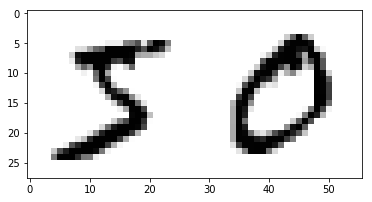

In [86]:
img0, img1 = X_train[0:2]
imgs = np.hstack([img0, img1])
plt.imshow(imgs, cmap="binary")

## Printing First 2 Targets From Training Data

In [87]:
print(y_train[0])
print(y_train[1])

5
0


## Preprocessing Predictors & Targets

In [88]:
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32')
X_train /= 255

input_shape = (X_train.shape[1],)

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32')
X_test /= 255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Inspecting Datasets After Preprocessing

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 12s 276us/step - loss: 0.2368 - acc: 0.9306 - val_loss: 0.1460 - val_acc: 0.9554
Epoch 2/30
42000/42000 [==============================] - 10s 227us/step - loss: 0.0907 - acc: 0.9721 - val_loss: 0.1047 - val_acc: 0.9682
Epoch 3/30
42000/42000 [==============================] - 8s 197us/step - loss: 0.0575 - acc: 0.9820 - val_loss: 0.0950 - val_acc: 0.9712
Epoch 4/30
42000/42000 [==============================] - 8s 194us/step - loss: 0.0397 - acc: 0.9880 - val_loss: 0.0972 - val_acc: 0.9711
Epoch 5/30
42000/42000 [==============================] - 8s 193us/step - loss: 0.0300 - acc: 0.9903 - val_loss: 0.0937 - val_acc: 0.9732
Epoch 6/30
42000/42000 [==============================] - 8s 197us/step - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0955 - val_acc: 0.9744
Epoch 7/30
42000/42000 [==============================] - 9s 210us/step - loss: 0.0162 - acc: 0.9952 - val_loss: 0.0972 

array([[2.63295030e-09, 3.32740085e-10, 2.44088092e-08, ...,
        9.99994755e-01, 2.44788700e-09, 2.96747970e-07],
       [3.95598398e-12, 8.68307453e-08, 9.99998927e-01, ...,
        5.17141016e-15, 7.89313560e-07, 2.08285957e-13],
       [2.52491446e-07, 9.99780953e-01, 1.07969945e-05, ...,
        1.43384459e-04, 4.95914828e-05, 1.75294460e-07],
       ...,
       [2.37592128e-15, 6.20558563e-14, 5.09933960e-14, ...,
        1.07372010e-07, 1.19797834e-08, 5.40249084e-06],
       [6.49075021e-12, 1.14488912e-14, 1.03591087e-17, ...,
        1.15058258e-11, 5.85455098e-08, 1.00114559e-14],
       [9.29076260e-12, 1.28738081e-14, 1.59799864e-11, ...,
        4.60648831e-15, 3.06569447e-14, 2.09263153e-15]], dtype=float32)

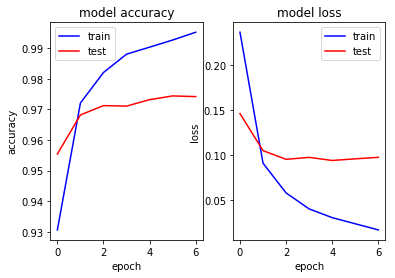

In [91]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=input_shape))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(patience=2)
hist_callback = model.fit(X_train, y_train, validation_split=0.3, epochs=30, callbacks=[callback])

model_json = model.to_json()
with open("model.json","w") as file:
    file.write(model_json)
model.save_weights("model.h5")

plt.clf()
plt.subplot(1,2,1)
plt.plot(hist_callback.history['acc'], color='b')
plt.plot(hist_callback.history['val_acc'], color='r')
plt.title('model accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(hist_callback.history['loss'], color='b')
plt.plot(hist_callback.history['val_loss'], color='r')
plt.title('model loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper right')

model_1.predict([X_test])